# PROJECT:Sales Channel Prediction

In [1]:
#Import the required Libraries
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Lets create a dataframe from given csv file
df= pd.read_csv('Advertising.csv')

In [3]:
#Lets check the shape of the data
df.shape


(200, 5)

In [4]:
#Lets see the first 5 rows of the data
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
#Lets drop the first unnamed colums as it just unique sequence
df.drop('Unnamed: 0',axis=1, inplace=True)

In [6]:
#Lets again see the first 5 rows of the data
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
# Lets check the datatypes
df.dtypes 


TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [8]:
# Lets get more information about the data
df.info()

# Output is continuous hence it is a regression problem

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


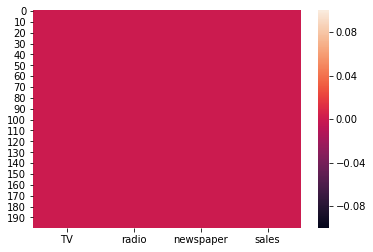

In [9]:
# Lets check the missing values
sns.heatmap(df.isnull())
plt.show()
# Great its showing no missing values

In [10]:
# Lets confirm about missing value once more
df.isnull().sum()
#Hence we are now sure there are no missing values

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [11]:
# Lets see the descriptive statistics
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [12]:
#Lets see the correlation among the different features as well as with target
df.corr()
# we can  see there is high  positive correlation of sales with TV and low positive correlation with newspaper

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


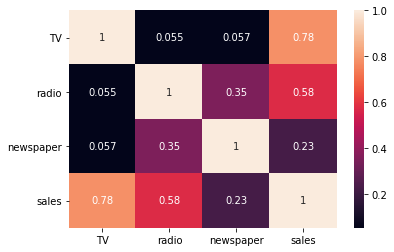

In [13]:
# lets visualize the correlation with heat map
sns.heatmap(df.corr(), annot = True)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000069CF3AB438>,
      dtype=object)

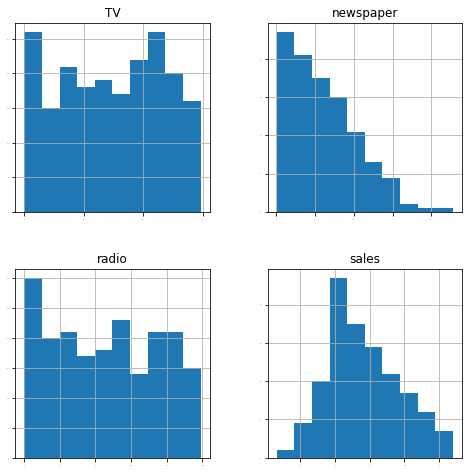

In [14]:
#Lets visualize distribution of numeric data
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1,   figsize=(8,8))
#WE CAN SEE SEVERAL VARIBALES HAVE SKEWNESS MOSTLY POSITIVELY SKEWED

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000069CF3AB400>,
      dtype=object)

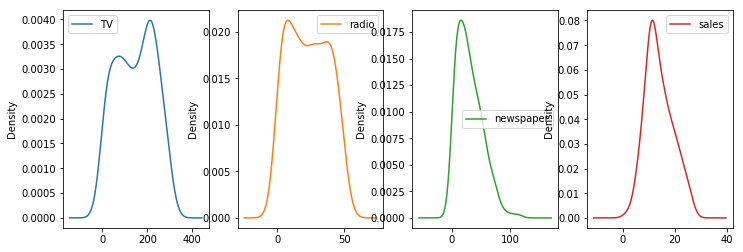

In [15]:
# # Univariate Density Plots of all numeric variables
df.plot(kind='density', subplots=True, layout=(1,4), sharex=False, figsize=(12,4))

TV              AxesSubplot(0.125,0.71587;0.168478x0.16413)
radio        AxesSubplot(0.327174,0.71587;0.168478x0.16413)
newspaper    AxesSubplot(0.529348,0.71587;0.168478x0.16413)
sales        AxesSubplot(0.731522,0.71587;0.168478x0.16413)
dtype: object

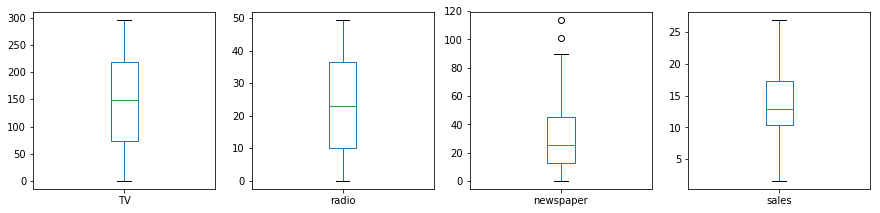

In [16]:
#Lets plot the box plot of each numeric variable
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(15,15))


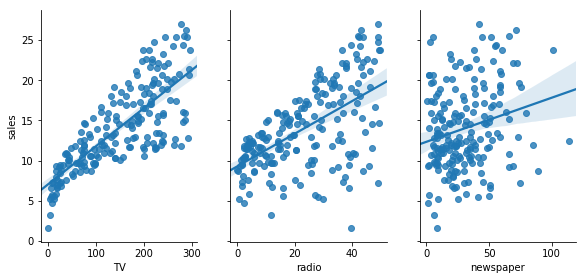

In [17]:
#Lets explore the relation with amount spent of TV AD, RADIO AD, NEWS PAPER  and SALES 
sns.pairplot(df, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', size=4, aspect=0.7, kind='reg')
#it seems a strong linear relation between sales and TV Ads
#it seems a a little weeker relation between sales and radio Ads
# it seems a very week relation between sales and newspaper ads

In [18]:
#Lets check the skewness of numeric data
df.skew()
#there is some positive skewness in newspaper ad which not in acceptable range

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

In [19]:
# Let us remove the Skewness with sqrt as it is postively skewed
for col in df.columns:                                      
    if df.skew().loc[col]>0.55:
        df[col]=np.power(df[col],1/2)

In [20]:
#Lets check skewness in data
df.skew()
# great skewness has been reduced

TV          -0.069853
radio        0.094175
newspaper    0.062388
sales        0.407571
dtype: float64

In [21]:
# Lets remove the outliers if any
from scipy.stats import zscore
z_score =abs(zscore(df))
dfx = df.loc[(z_score<3).all(axis=1)]
print('The shape of original dataframe was =', df.shape)
print('The shape of dataframe after removing outliers is =', dfx.shape)


The shape of original dataframe was = (200, 4)
The shape of dataframe after removing outliers is = (200, 4)


In [22]:
# Let us seperate the features and Target
x=dfx.drop(['sales'],axis=1)    
y=dfx[['sales']]

In [23]:
#lets see first 5 rows of x
x.head()
# x now contains only features

,TV,radio,newspaper
0,230.1,37.8,8.318654
1,44.5,39.3,6.715653
2,17.2,45.9,8.324662
3,151.5,41.3,7.648529
4,180.8,10.8,7.641989


In [24]:
#Lets check first five rows of target
y.head()
# y now contains only target variable

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [25]:
#Lets see which of the algorithims performs well on the given data
# A good way to check their performance is cross validation
#Lets import the algorithims/models to be evaluated  AND OTHER REQUIRED LIBRARIES
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

In [26]:
# Lets import standard scaler as distance based algorithim require data to be in same scale
from sklearn.preprocessing import StandardScaler
# Lets create a list of models to be evaluated ALONG with pipeline
pipelines = []
pipelines.append(('LR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('Lasso', Pipeline([('Scaler', StandardScaler()),('Lasso',Lasso())])))
pipelines.append(('Ridge', Pipeline([('Scaler', StandardScaler()),('Ridge', Ridge())])))
pipelines.append(('EN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('DT', Pipeline([('Scaler', StandardScaler()),('DT', DecisionTreeRegressor(random_state=5))])))
pipelines.append(('SVR', Pipeline([('Scaler', StandardScaler()),('SVM', SVR())])))
pipelines.append(('KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))




In [27]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [28]:

#Let us check which model will perform well on the given data on the basis of mean crossval r2score and its std dev
results = []
names = []
for name, model in pipelines: 
    kfold = KFold(n_splits=10, random_state=1) 
    cv_results = cross_val_score(model, x, y, cv=10, scoring='r2') 
    results.append(cv_results) 
    names.append(name) 
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.885560 (0.052352)
Lasso: 0.814955 (0.061015)
Ridge: 0.885666 (0.052592)
EN: 0.730264 (0.065970)
DT: 0.948855 (0.019058)
SVR: 0.914480 (0.056620)
KNN: 0.943829 (0.031890)


In [29]:
#Let us check which model will perform well on the given data on the basis of mean crossval score(neg_mean_squared_error) and its std dev
results1 = []
names1 = []
for name, model in pipelines: 
    kfold1 = KFold(n_splits=10, random_state=1) 
    cv_results1 = cross_val_score(model, x, y, cv=kfold1, scoring='neg_mean_squared_error') 
    results1.append(cv_results1) 
    names1.append(name) 
    msg = "%s: %f (%f)" % (name, cv_results1.mean(), cv_results1.std())
    print(msg)

LR: -3.053455 (1.816684)
Lasso: -4.928015 (2.265973)
Ridge: -3.051994 (1.825979)
EN: -7.198877 (2.821508)
DT: -1.318400 (0.552369)
SVR: -2.405808 (2.034369)
KNN: -1.551794 (1.150312)


In [30]:
#lets  see  the performance if any of the three chosen ensemble technique  with default paramters can perform better in terms of NMSE
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
ensemble = [('RF', RandomForestRegressor(random_state=5)),('ADR',AdaBoostRegressor(random_state=5)),('GBR',GradientBoostingRegressor(random_state=5))]
results2 = []
names2 = []
for name, model in ensemble: 
    kfold2 = KFold(n_splits=10, random_state=1) 
    cv_results2 = cross_val_score(model, x, y, cv=kfold2, scoring='neg_mean_squared_error') 
    results2.append(cv_results2) 
    names2.append(name) 
    msg2 = "%s: %f (%f)" % (name, cv_results2.mean(), cv_results2.std())
    print(msg2)                                              


RF: -0.628347 (0.214390)
ADR: -1.104015 (0.225237)
GBR: -0.516516 (0.316542)


In [31]:
#lets  see  the performance if any of the three chosen ensemble technique  with default paramters can perform better in terms of r2 score
results3 = []
names3 = []
for name, model in ensemble: 
    kfold3 = KFold(n_splits=10, random_state=1) 
    cv_results3 = cross_val_score(model, x, y, cv=kfold3, scoring='r2') 
    results3.append(cv_results3) 
    names3.append(name) 
    msg3 = "%s: %f (%f)" % (name, cv_results3.mean(), cv_results3.std())
    print(msg3) 

RF: 0.975850 (0.006485)
ADR: 0.957093 (0.008563)
GBR: 0.981067 (0.008634)


In [32]:
comparison = {'Algo' :['Logistics_Regression', 'Lasso','Ridge','Elastic_NET','Decision_Tree', 'SVR','KNN','Random_Forest','Adaptive_Boosting','Gradient_Boosting'],'r2_score': [0.885560,0.814955,0.885666,0.730264,0.948855,0.914480,0.943829,0.975850,0.957093,0.981067],'Negative_MSE':[-3.053455,-4.928015,-3.051994,-7.198877,-1.318400,-2.405808,-1.551794,-0.628347,-1.104015,-0.516516]}
comparative_analysis = pd.DataFrame(comparison)

Lets see the comparative cross val performance

In [33]:
comparative_analysis.sort_values(by= 'r2_score',ascending=False)

,Algo,r2_score,Negative_MSE
9,Gradient_Boosting,0.981067,-0.516516
7,Random_Forest,0.975850,-0.628347
8,Adaptive_Boosting,0.957093,-1.104015
4,Decision_Tree,0.948855,-1.318400
6,KNN,0.943829,-1.551794
5,SVR,0.914480,-2.405808
2,Ridge,0.885666,-3.051994
0,Logistics_Regression,0.885560,-3.053455
1,Lasso,0.814955,-4.928015
3,Elastic_NET,0.730264,-7.198877


In [34]:
# Great to see Gradient boosting and Random forest are giving very good CROSS VAL r2 score  and nmse 
# So either we can choose GB or RF
# Lets Prefer Gradient boosting due to its highest r2 score and lowest nmse


In [35]:
#Lets try to check if  cross val performance of GB  in terms of nmse can be improved  by changing parameters
from sklearn.model_selection import GridSearchCV
kfoldx = KFold(n_splits=10, random_state=1) 
param_grid = {'n_estimators': [50,100,150,200,300,400,500 ], 'learning_rate': [0.01,0.05,0.1,0.2,0.3,0.5,1], 'max_depth': [2,3,4,5,6,7,8],
'min_samples_split': [2,3,4], 'min_samples_leaf':[1,2,3]}

mod = GradientBoostingRegressor(random_state=5)
grid = GridSearchCV(estimator=mod, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfoldx,n_jobs=-1)
grid_result = grid.fit(x, y)

In [36]:
grid_result.best_score_ 
#Great to see that cross val nmse has been decreased

-0.4809669704794892

In [37]:
#lets check what are the best parameters
grid_result.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

In [38]:
#Lets see what is best estimator
grid_result.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=3,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, n_iter_no_change=None, presort='auto',
             random_state=5, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [39]:
# Lets import the library to split train and test data
from sklearn.model_selection import train_test_split

In [40]:
#Lets find out the best random state for selected gradient boosting regressor in terms of lowest mse score

min_mse=100
gb= GradientBoostingRegressor(learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=200, random_state=5)
for i in range(1,100):
    X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=i)
       
    gb.fit(X_train,y_train)
    ypreds=gb.predict(X_test)
    mse_c=mean_squared_error(y_test, ypreds)
    print('At random state ', i, 'the value of mse is ', mse_c)
    if mse_c<min_mse:
        min_mse=mse_c
        finalstate=i
print()
print()
print('min mse is', min_mse,'at random state' , finalstate)

At random state  1 the value of mse is  0.4531928560320714
At random state  2 the value of mse is  0.5683447694150534
At random state  3 the value of mse is  0.3997163600087913
At random state  4 the value of mse is  0.521916556309655
At random state  5 the value of mse is  0.4374725846820959
At random state  6 the value of mse is  0.5991957929619527
At random state  7 the value of mse is  0.5302651183256908
At random state  8 the value of mse is  0.8708557623331169
At random state  9 the value of mse is  0.6484719948517045
At random state  10 the value of mse is  1.0438224247948127
At random state  11 the value of mse is  0.8529241996964414
At random state  12 the value of mse is  0.6118242955532198
At random state  13 the value of mse is  0.5852663343406829
At random state  14 the value of mse is  1.5454668504678055
At random state  15 the value of mse is  0.37834238064859094
At random state  16 the value of mse is  0.3374755172650113
At random state  17 the value of mse is  1.019096

In [41]:
#Lets build the model using the best random state
X_train, X_test, y_train,y_test = train_test_split(x,y,test_size=0.2, random_state = 84)
GBR= GradientBoostingRegressor(learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=200, random_state=5)
GBR.fit(X_train,y_train)
ypred=GBR.predict(X_test)
r2_scr=r2_score(y_test, ypred)
mse=mean_squared_error(y_test, ypred)
rmse = np.sqrt(mse)
mae= mean_absolute_error(y_test, ypred)
print('r2_score is', r2_scr)
print('mse is', mse)
print('rmse is', rmse)
print('mae is', mae)

r2_score is 0.9910990049656363
mse is 0.2179577753069611
rmse is 0.46685948132919086
mae is 0.37005227282877384


In [42]:
#Lets  verify its r2 cross val score
kfoldx = KFold(n_splits=10, random_state=1)
cross_val_score(GradientBoostingRegressor(learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=200, random_state=5),x,y,cv=kfoldx,scoring="r2").mean()

0.9817754434231676

In [43]:
#Lets see its neg mean square error  cross val score
kfoldx = KFold(n_splits=10, random_state=1)
cross_val_score(GradientBoostingRegressor(learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=200, random_state=5),x,y,cv=kfoldx,scoring="neg_mean_squared_error").mean()


-0.4809669704794892

In [44]:
# Also as already verified we are getting improved nmse score

Awesome we can see that test score and cross val score are very close 

In [45]:
# Lets save the predicted result to a csv file
dfx = pd.DataFrame(ypred)
dfx.to_csv('GBR_sales_prediction.csv')

In [46]:
# Lets dump our model into pkl file
from sklearn.externals import joblib
joblib.dump(GBR,'GBR_SALES.pkl')

['GBR_SALES.pkl']